## Run KNN on dataset using pandas

In [206]:
# ToDo: add robusta, scrape addtl 2019 coffee reviews and clean/append

In [136]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

### Quality Measures
Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Cup Cleanliness, Sweetness, Moisture, Defects  

### Bean Metadata
Processing Method, Color, Species (arabica / robusta)  

### Farm Metadata
Owner, Country of Origin, Farm Name, Lot Number, Mill, Company, Altitude, Region

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import StandardScaler #scale data
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.metrics import classification_report, confusion_matrix # eval performance
import sklearn

In [6]:
df = pd.read_csv('/Users/sumac/projects/metis/project3/arabica_data_cleaned.csv')

In [7]:
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [8]:
df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [24]:
classify_data = df.drop(['Species','Unnamed: 0', 'Owner','Farm.Name','Lot.Number', 'Mill', 'ICO.Number', 'Company', \
                         'Altitude', 'Region', 'Producer','Bag.Weight', 'In.Country.Partner','Harvest.Year', 'Grading.Date', \
                         'Owner.1','Variety','Color','Quakers','Expiration','Number.of.Bags', 'Certification.Body','Certification.Address', \
                         'Certification.Contact', 'unit_of_measurement'],axis=1)

#                   keep ['Species','Country.of.Origin', 'Altitude',   \
#                          'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', \
#                          'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', \
#                          'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Category.Two.Defects', \
#                          'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'], axis=1)

In [35]:
classify_data.head(20)

,Country,Process,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Category_Two_Defects,Altitude_Lowest_Meters,Altitude_Highest_Meters,Altitude_Mean_Meters
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,90.58,0.12,0,0,1950.0,2200.0,2075.0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,89.92,0.12,0,1,1950.0,2200.0,2075.0
2,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,89.75,0.00,0,0,1600.0,1800.0,1700.0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,89.00,0.11,0,2,1800.0,2200.0,2000.0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,88.83,0.12,0,2,1950.0,2200.0,2075.0
5,Brazil,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,10.00,8.33,88.83,0.11,0,1,NaN,NaN,NaN
6,Peru,Washed / Wet,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,10.00,8.50,88.75,0.11,0,0,NaN,NaN,NaN
7,Ethiopia,NaN,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,9.33,9.00,88.67,0.03,0,0,1570.0,1700.0,1635.0
8,Ethiopia,NaN,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,9.33,8.67,88.42,0.03,0,0,1570.0,1700.0,1635.0
9,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,10.00,8.50,88.25,0.10,0,4,1795.0,1850.0,1822.5


In [120]:
# clean up the column names so we can see the unique vals and fill in the NaNs
classify_data.rename(index=str, columns={"Processing.Method": "Process", "Country.of.Origin": "Country",\
                                         "Clean.Cup" : "Clean_Cup", "Cupper.Points" : "Cupper_Points",\
                                         "Total.Cup.Points" : "Total_Cup_Points",\
                                         "Category.One.Defects" : "Category_One_Defects",\
                                         "Category.Two.Defects" : "Category_Two_Defects",\
                                         "altitude_low_meters" : "Altitude_Lowest_Meters",\
                                         "altitude_high_meters" : "Altitude_Highest_Meters",\
                                         "altitude_mean_meters" : "Altitude_Mean_Meters" }, inplace=True)

In [20]:
classify_data.Country.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [22]:
classify_data['Altitude_Lowest_Meters'].isna().sum()

227

In [121]:
data = classify_data.dropna()

In [125]:
data.dtypes

Country                     object
Process                     object
Aroma                      float64
Flavor                     float64
Aftertaste                 float64
Acidity                    float64
Body                       float64
Balance                    float64
Uniformity                 float64
Clean_Cup                  float64
Sweetness                  float64
Cupper_Points              float64
Total_Cup_Points           float64
Moisture                   float64
Category_One_Defects         int64
Category_Two_Defects         int64
Altitude_Lowest_Meters     float64
Altitude_Highest_Meters    float64
Altitude_Mean_Meters       float64
dtype: object

In [122]:
data.head(20)

,Country,Process,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Category_Two_Defects,Altitude_Lowest_Meters,Altitude_Highest_Meters,Altitude_Mean_Meters
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0,1950.0,2200.0,2075.0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,1,1950.0,2200.0,2075.0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,2,1800.0,2200.0,2000.0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,2,1950.0,2200.0,2075.0
9,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,0.10,0,4,1795.0,1850.0,1822.5
10,Ethiopia,Natural / Dry,8.17,8.67,8.25,8.50,7.75,8.17,10.0,10.0,10.0,8.58,88.08,0.10,0,1,1855.0,1955.0,1905.0
11,United States,Washed / Wet,8.25,8.42,8.17,8.33,8.08,8.17,10.0,10.0,10.0,8.50,87.92,0.00,0,0,1872.0,1872.0,1872.0
12,United States,Washed / Wet,8.08,8.67,8.33,8.42,8.00,8.08,10.0,10.0,10.0,8.33,87.92,0.00,0,0,1943.0,1943.0,1943.0
15,United States,Washed / Wet,8.00,8.50,8.58,8.17,8.17,8.00,10.0,10.0,10.0,8.17,87.58,0.00,0,0,2080.0,2080.0,2080.0
18,China,Washed / Wet,8.42,8.25,8.08,8.17,7.92,8.00,10.0,10.0,10.0,8.42,87.25,0.10,0,0,1450.0,1450.0,1450.0


In [146]:
dummy = pd.get_dummies(data, columns=['Process'], drop_first=True)
dummy.head()

,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Category_Two_Defects,Altitude_Lowest_Meters,Altitude_Highest_Meters,Altitude_Mean_Meters,Process_Other,Process_Pulped natural / honey,Process_Semi-washed / Semi-pulped,Process_Washed / Wet
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0,1950.0,2200.0,2075.0,0,0,0,1
1,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,1,1950.0,2200.0,2075.0,0,0,0,1
3,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,2,1800.0,2200.0,2000.0,0,0,0,0
4,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,2,1950.0,2200.0,2075.0,0,0,0,1
9,Ethiopia,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,0.10,0,4,1795.0,1850.0,1822.5,0,0,0,0


In [150]:
# X contains the attributes, y contains the labels
# [row_start:row_end, col_start:col_end]
y = data.iloc[:,0].values
X = data.iloc[:,2:].values

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # train, test split

In [189]:
scaler = StandardScaler()  # normalize
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [190]:
classifier = KNeighborsClassifier(n_neighbors=3)# n_neighbors = sqrt(num datapoints)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

In [191]:
# evaluate performance  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 9  0  1  1  0  1  1  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2
   0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0  0  0]
 [ 6  0  0 17  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0]
 [ 1  0  0  5  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 5  0  1  1  1  0  0 16  0  1  0  0  1  0  0  1  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 3  0  0  0  2  0  0  1  0  3  0  0  0  0  0  3  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1
   0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [193]:
error = []

# Calculating error for K values between 1 and 40

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

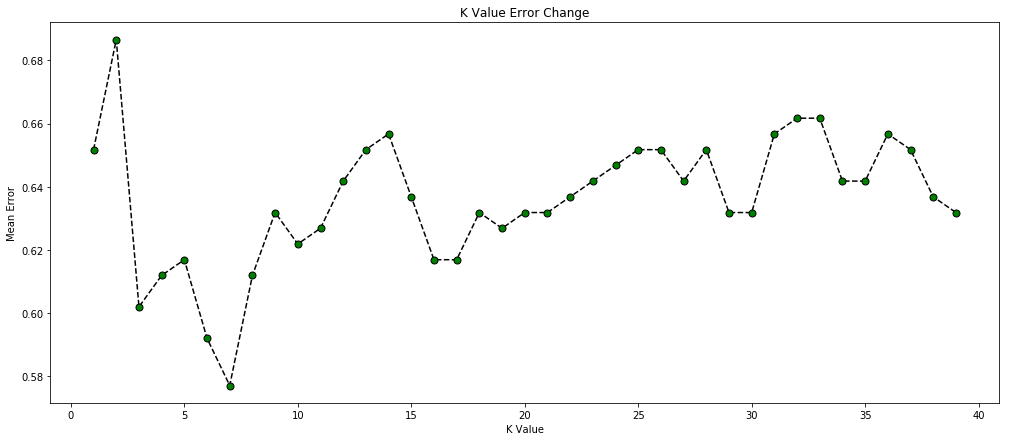

In [205]:
plt.figure(figsize=(17, 7))  
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o', markerfacecolor='green', markersize=7)
plt.title('K Value Error Change')
plt.xlabel('K Value')
plt.ylabel('Mean Error')